In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("zomato_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [4]:
data.describe()

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
count,91421.000000,122377.000000,123657.000000,123657.000000,123657.000000,123657.000000
mean,3.822264,3.963184,152.729858,115.763725,24.666772,241.378399
std,0.408693,0.245900,232.214061,243.970828,125.236009,192.830713
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000
25%,3.600000,3.800000,0.000000,0.000000,0.000000,130.000000
50%,3.900000,4.000000,30.000000,0.000000,0.000000,208.570000
75%,4.100000,4.100000,217.000000,23.000000,15.000000,299.000000
max,4.800000,4.600000,997.000000,983.000000,9750.000000,12024.000000


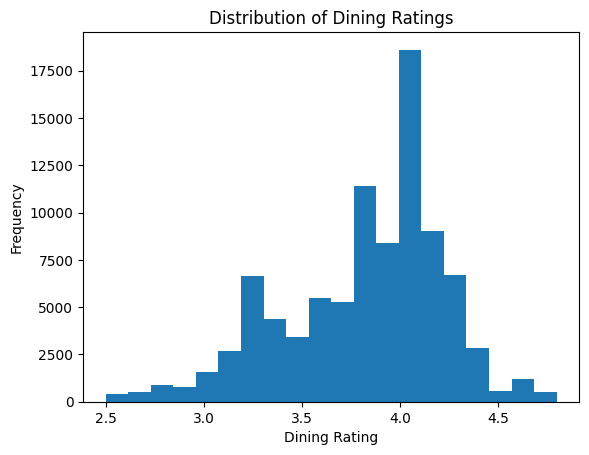

In [5]:
plt.hist(data['Dining Rating'], bins = 20)
plt.xlabel('Dining Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Dining Ratings')
plt.show()

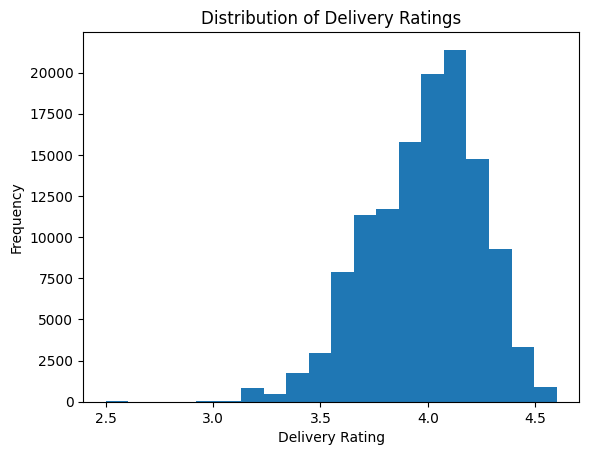

In [6]:
plt.hist(data['Delivery Rating'], bins = 20)
plt.xlabel('Delivery Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Ratings')
plt.show()

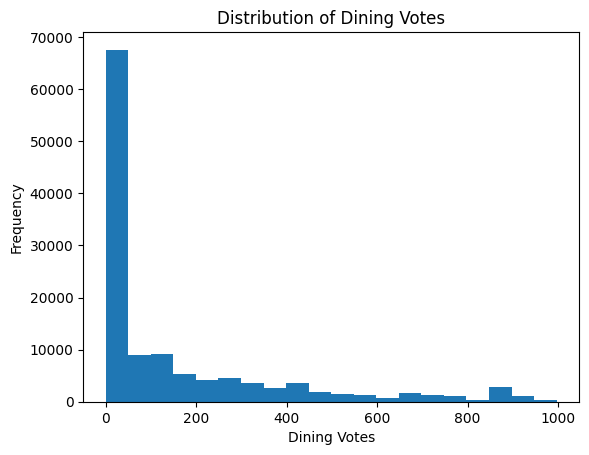

In [7]:
plt.hist(data['Dining Votes'], bins = 20)
plt.xlabel('Dining Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Dining Votes')
plt.show()

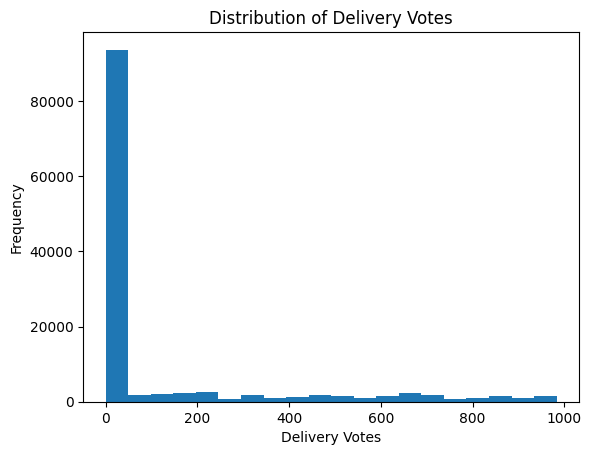

In [8]:
plt.hist(data['Delivery Votes'], bins = 20)
plt.xlabel('Delivery Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Votes')
plt.show()

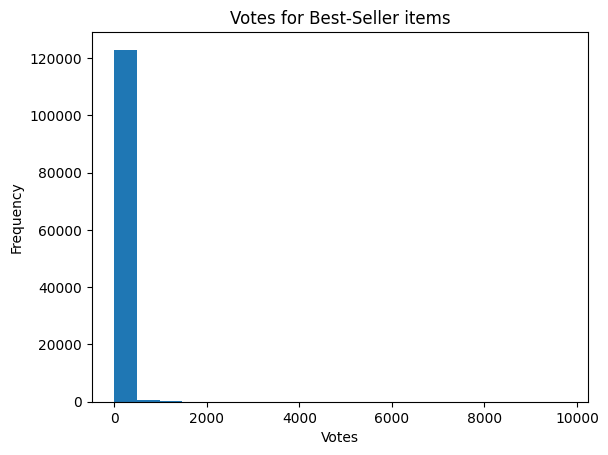

In [9]:
plt.hist(data['Votes'], bins = 20)
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.title('Votes for Best-Seller items')
plt.show()

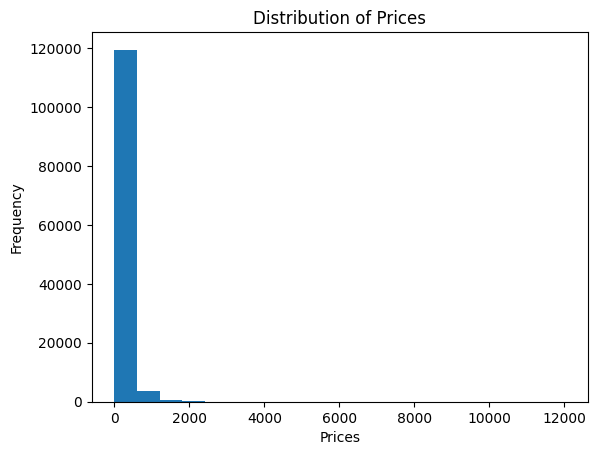

In [10]:
plt.hist(data['Prices'], bins = 20)
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

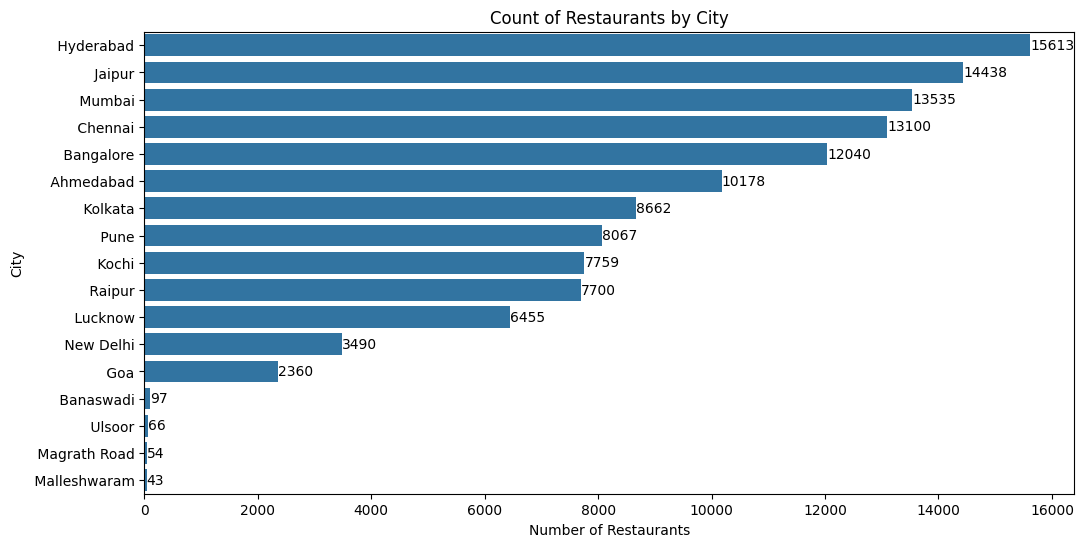

In [11]:
city_counts = data['City'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='City', data=data, order=city_counts.index)
plt.title('Count of Restaurants by City')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')

for p in ax.patches:
  ax.annotate(format(p.get_width(), '.0f'),
              (p.get_width() + 0.5, p.get_y() + p.get_height() / 2),
              va='center')

plt.show()


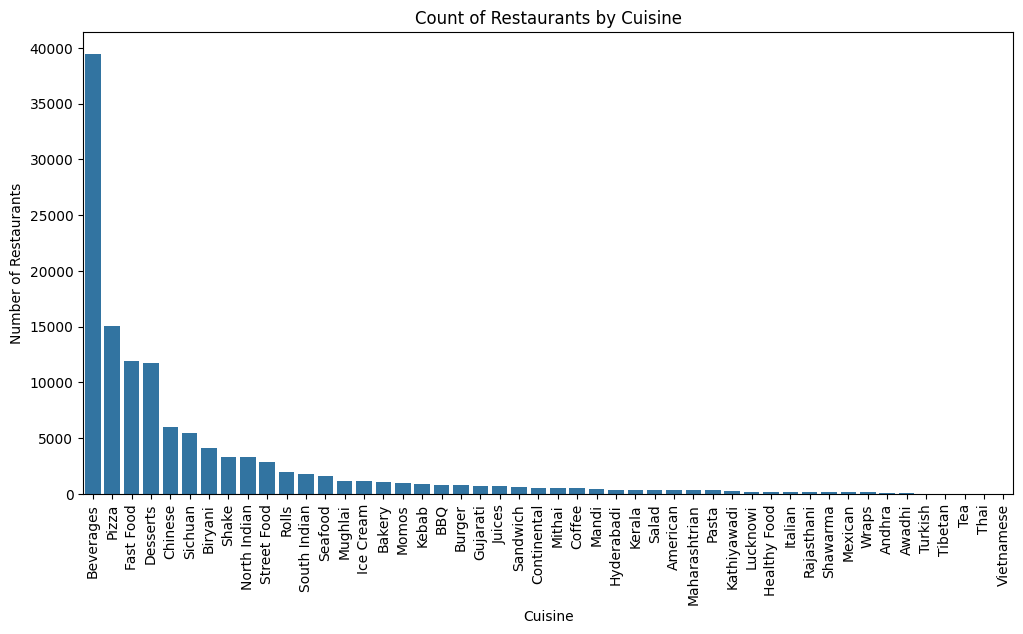

In [13]:
cuisine_counts = data['Cuisine '].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values)
plt.title('Count of Restaurants by Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

In [14]:
average_diningratings_by_restaurant = data.groupby('Restaurant Name')['Dining Rating'].mean()
average_diningratings_by_city = data.groupby('City')['Dining Rating'].mean()
print(average_diningratings_by_restaurant)
print(average_diningratings_by_city)

average_deliveryratings_by_restaurant = data.groupby('Restaurant Name')['Delivery Rating'].mean()
average_deliveryratings_by_city = data.groupby('City')['Delivery Rating'].mean()
print(average_deliveryratings_by_restaurant)
print(average_deliveryratings_by_city)

Restaurant Name
12 To 12 BBQ                4.0
1441 Pizzeria               NaN
1944 -The HOCCO Kitchen     4.3
4M Biryani House            4.1
7 Plates                    NaN
                           ... 
Zaffran Mataam Alarabi      4.1
Zam Zam Briyani             3.3
Zam Zam Restaurant          4.2
Zeeshan Biryani Corner      3.7
Zomoz - The Momo Company    NaN
Name: Dining Rating, Length: 826, dtype: float64
City
Ahmedabad       3.782658
Banaswadi       3.700000
Bangalore       3.762274
Chennai         3.819361
Goa             4.059551
Hyderabad       3.891525
Jaipur          3.769693
Kochi           3.819516
Kolkata         3.841879
Lucknow         3.877163
Magrath Road    3.500000
Malleshwaram    4.000000
Mumbai          3.841823
New Delhi       3.965188
Pune            3.720753
Raipur          3.855809
Ulsoor               NaN
Name: Dining Rating, dtype: float64
Restaurant Name
12 To 12 BBQ                4.0
1441 Pizzeria               4.0
1944 -The HOCCO Kitchen     4.3
4M Bi

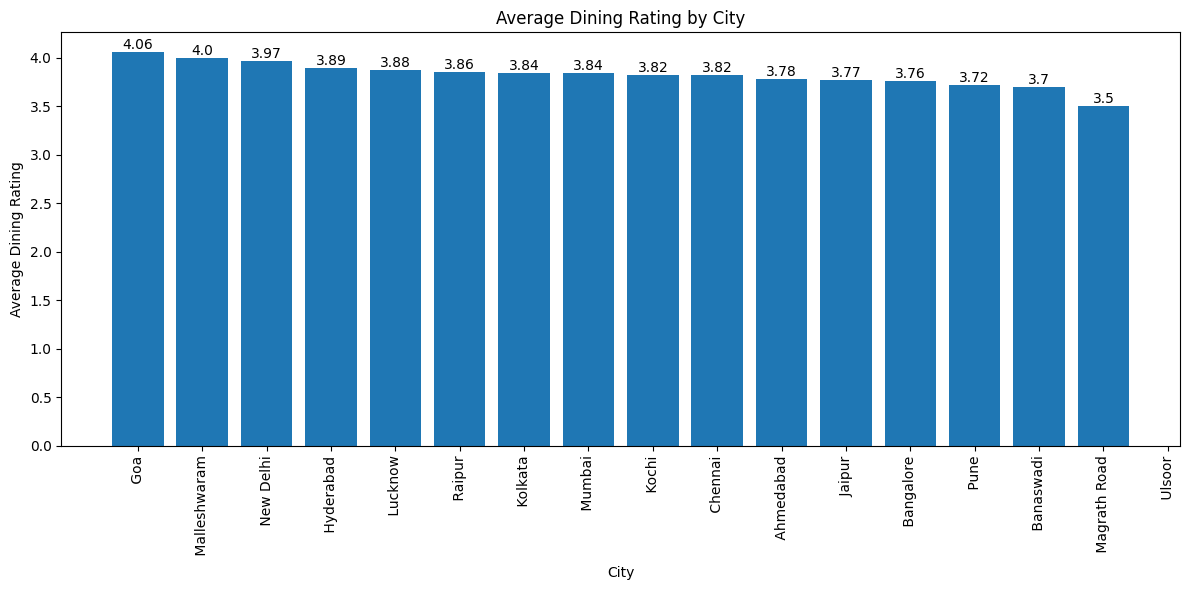

In [15]:
import matplotlib.pyplot as plt
average_diningratings_by_city_sorted = average_diningratings_by_city.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
bars = plt.bar(average_diningratings_by_city_sorted.index, average_diningratings_by_city_sorted.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Average Dining Rating')
plt.title('Average Dining Rating by City')

for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

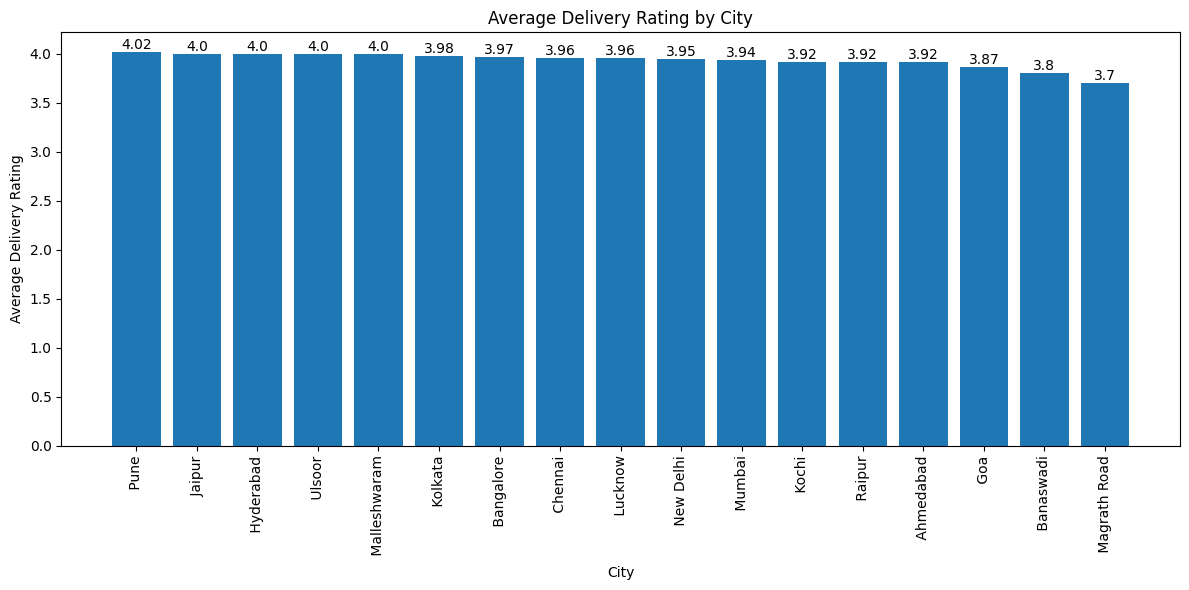

In [16]:
import matplotlib.pyplot as plt

average_deliveryratings_by_city_sorted = average_deliveryratings_by_city.sort_values(ascending=False)


plt.figure(figsize=(12, 6))
bars = plt.bar(average_deliveryratings_by_city_sorted.index, average_deliveryratings_by_city_sorted.values)
plt.xlabel('City')
plt.ylabel('Average Delivery Rating')
plt.title('Average Delivery Rating by City')
plt.xticks(rotation=90)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

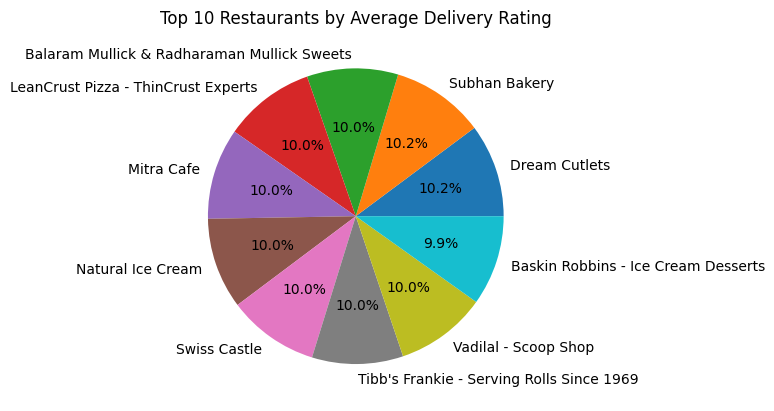

In [17]:
import matplotlib.pyplot as plt

top5_delivery_restaurants = average_deliveryratings_by_restaurant.nlargest(10) # Changed to 5
plt.pie(top5_delivery_restaurants, labels=top5_delivery_restaurants.index, autopct='%1.1f%%')
plt.title('Top 10 Restaurants by Average Delivery Rating')
plt.show()

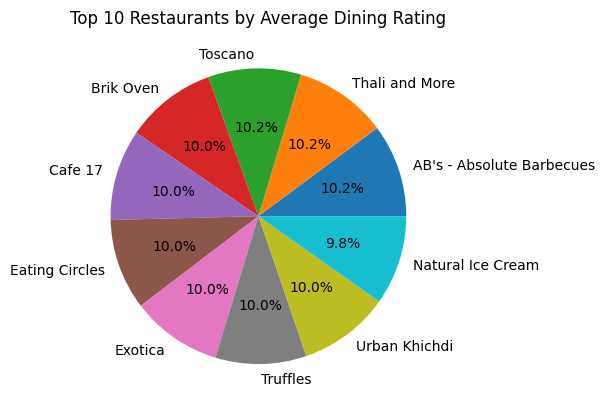

In [18]:
import matplotlib.pyplot as plt

top5_dining_restaurants = average_diningratings_by_restaurant.nlargest(10)
plt.pie(top5_dining_restaurants, labels=top5_dining_restaurants.index, autopct='%1.1f%%')
plt.title('Top 10 Restaurants by Average Dining Rating')
plt.show()

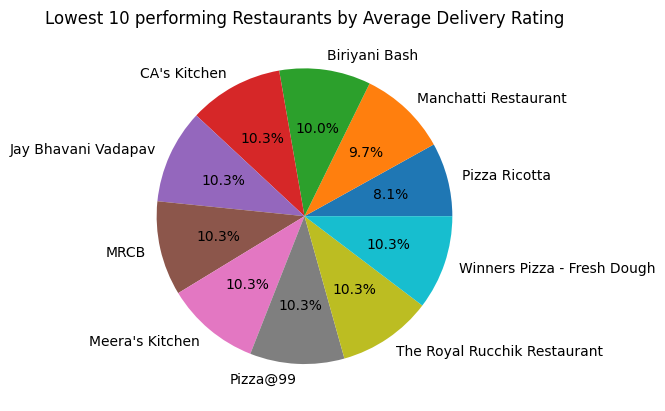

In [19]:
import matplotlib.pyplot as plt

low10_delivery_restaurants = average_deliveryratings_by_restaurant.nsmallest(10) # Changed to 5
plt.pie(low10_delivery_restaurants, labels=low10_delivery_restaurants.index, autopct='%1.1f%%')
plt.title('Lowest 10 performing Restaurants by Average Delivery Rating')
plt.show()

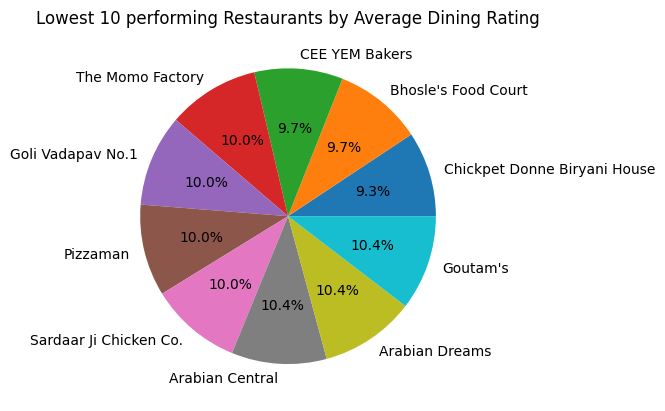

In [20]:
import matplotlib.pyplot as plt

low10_dining_restaurants = average_diningratings_by_restaurant.nsmallest(10)
plt.pie(low10_dining_restaurants, labels=low10_dining_restaurants.index, autopct='%1.1f%%')
plt.title('Lowest 10 performing Restaurants by Average Dining Rating')
plt.show()

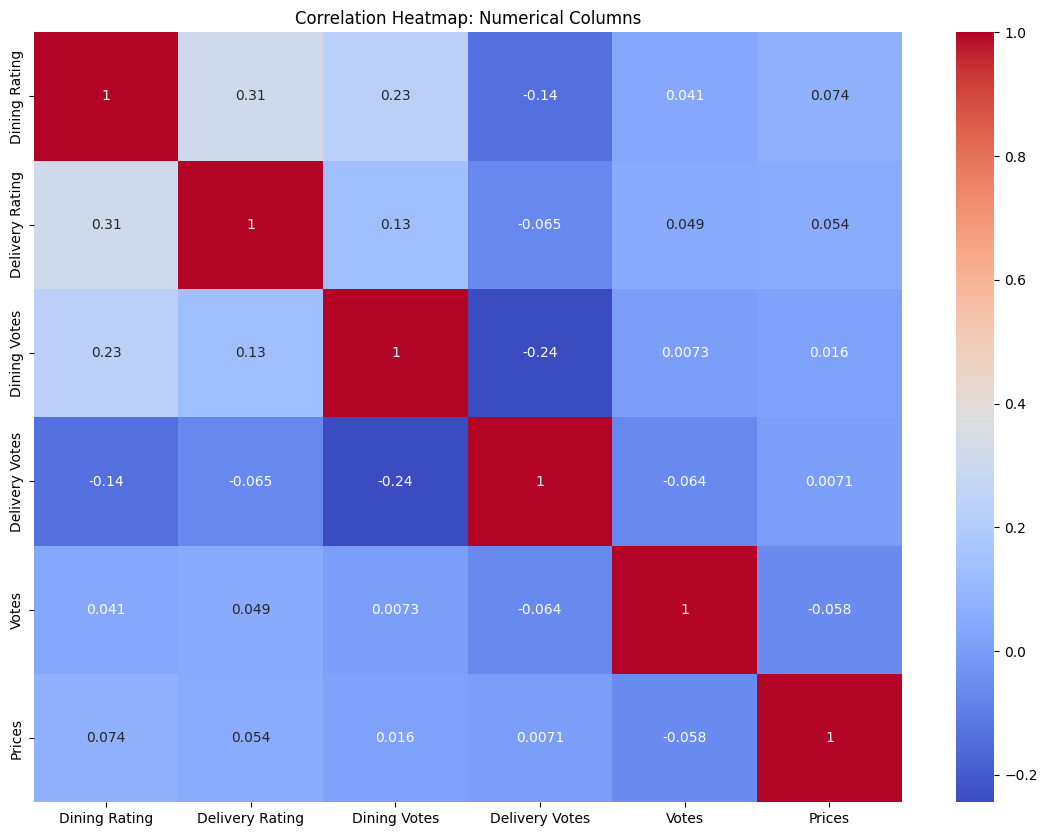

In [21]:
numerical_columns = data.select_dtypes(include=['number'])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Numerical Columns')
plt.show()

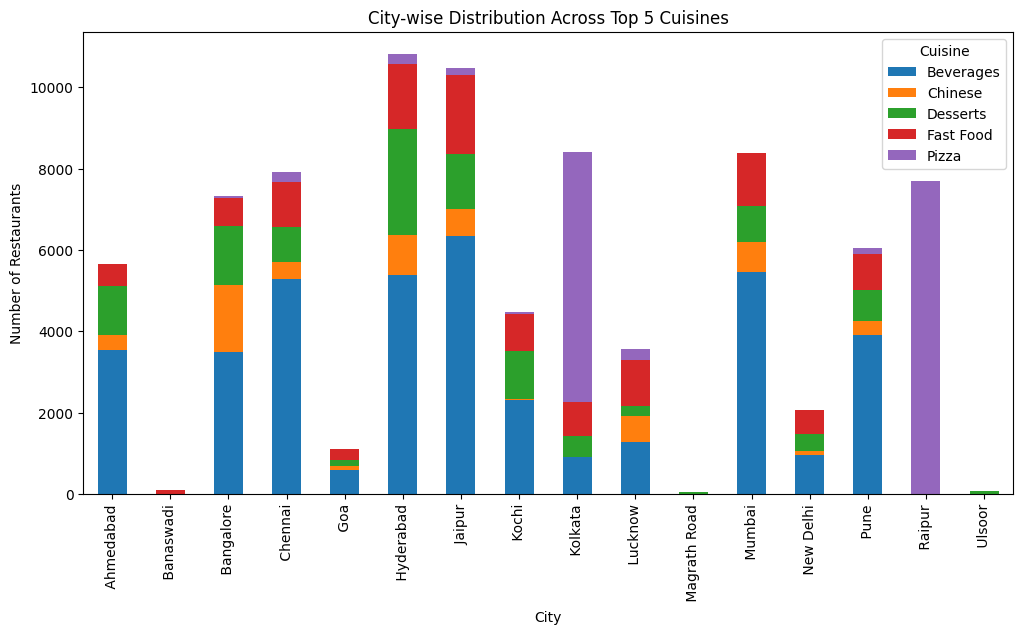

In [22]:
import matplotlib.pyplot as plt

top5_cuisines = data['Cuisine '].value_counts().nlargest(5).index

top5_cuisine_data = data[data['Cuisine '].isin(top5_cuisines)]

city_cuisine_counts = top5_cuisine_data.groupby(['City', 'Cuisine '])['Restaurant Name'].count().unstack()

city_cuisine_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('City-wise Distribution Across Top 5 Cuisines')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.legend(title='Cuisine')
plt.show()

In [23]:
average_prices_by_city = data.groupby('City')['Prices'].mean()

for city, avg_price in average_prices_by_city.items():
  above_average_restaurants = data[(data['City'] == city) & (data['Prices'] > avg_price)]['Restaurant Name'].unique()
  total_restaurants_in_city = data[data['City'] == city]['Restaurant Name'].nunique()
  if len(above_average_restaurants) > 0:
    percentage_above_average = (len(above_average_restaurants) / total_restaurants_in_city) * 100
    print(f"In {city}, {percentage_above_average:.2f}% of restaurants have above-average prices:")

In  Ahmedabad, 83.78% of restaurants have above-average prices:
In  Banaswadi, 100.00% of restaurants have above-average prices:
In  Bangalore, 82.72% of restaurants have above-average prices:
In  Chennai, 90.80% of restaurants have above-average prices:
In  Goa, 83.87% of restaurants have above-average prices:
In  Hyderabad, 89.15% of restaurants have above-average prices:
In  Jaipur, 95.65% of restaurants have above-average prices:
In  Kochi, 86.11% of restaurants have above-average prices:
In  Kolkata, 95.31% of restaurants have above-average prices:
In  Lucknow, 87.72% of restaurants have above-average prices:
In  Magrath Road, 100.00% of restaurants have above-average prices:
In  Malleshwaram, 100.00% of restaurants have above-average prices:
In  Mumbai, 92.50% of restaurants have above-average prices:
In  New Delhi, 91.67% of restaurants have above-average prices:
In  Pune, 91.67% of restaurants have above-average prices:
In  Raipur, 88.46% of restaurants have above-average price

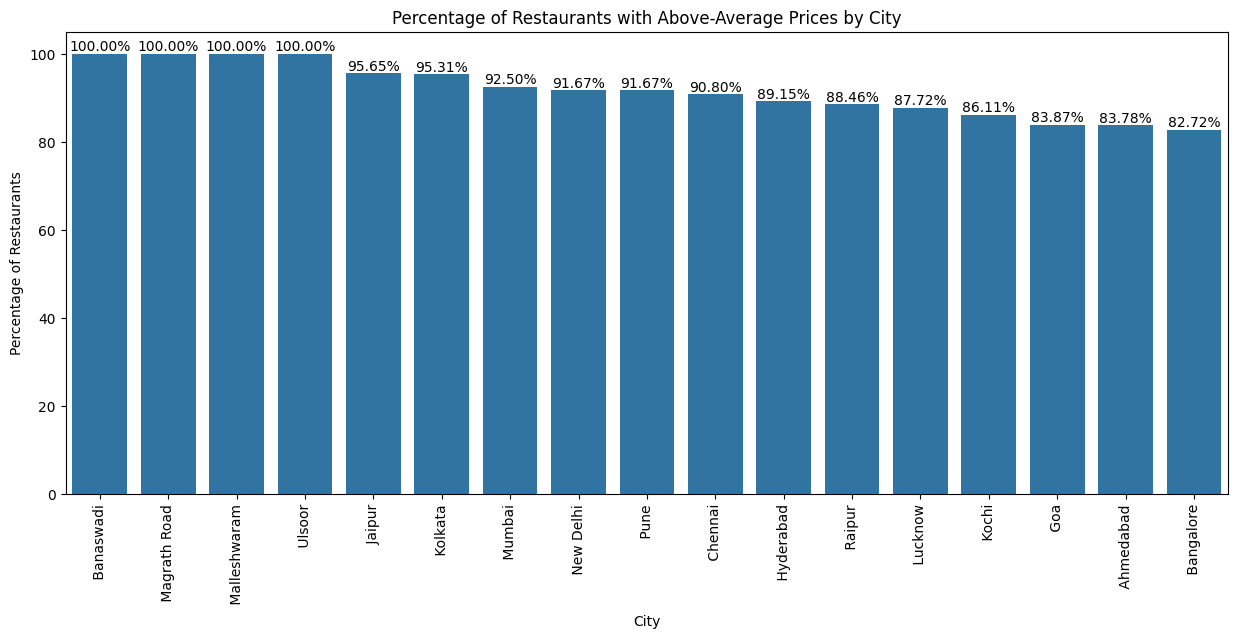

In [24]:
import matplotlib.pyplot as plt

average_prices_by_city = data.groupby('City')['Prices'].mean()

above_average_percentages = {}

for city, avg_price in average_prices_by_city.items():
  above_average_restaurants = data[(data['City'] == city) & (data['Prices'] > avg_price)]['Restaurant Name'].unique()
  total_restaurants_in_city = data[data['City'] == city]['Restaurant Name'].nunique()
  if total_restaurants_in_city > 0:
    percentage_above_average = (len(above_average_restaurants) / total_restaurants_in_city) * 100
    above_average_percentages[city] = percentage_above_average

sorted_cities = sorted(above_average_percentages, key=above_average_percentages.get, reverse=True)

plt.figure(figsize=(15, 6))
ax = sns.barplot(x=sorted_cities, y=[above_average_percentages[city] for city in sorted_cities])
plt.title('Percentage of Restaurants with Above-Average Prices by City')
plt.xlabel('City')
plt.ylabel('Percentage of Restaurants')
plt.xticks(rotation=90)

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f') + '%',
              (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()